<a href="https://colab.research.google.com/github/aryan1429/deep-learning-lab/blob/main/cnn_cifar_keras(w4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Import Libraries
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPool2D,Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [23]:
#Load the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [24]:
#Categorical/One Hot Encoding
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(X_train.shape)

(50000, 10)
(50000, 32, 32, 3)


In [25]:
#Build the architecture
model = Sequential()
model.add(Conv2D(6,(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
#Compile
model.compile(optimizer = "Adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [32]:
result = model.fit(X_train,y_train, epochs = 10 , batch_size = 64,validation_data = (X_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8730 - loss: 0.3665 - val_accuracy: 0.3939 - val_loss: 4.0784
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8925 - loss: 0.3185 - val_accuracy: 0.3893 - val_loss: 4.2481
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.8964 - loss: 0.3116 - val_accuracy: 0.3917 - val_loss: 4.3730
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9066 - loss: 0.2771 - val_accuracy: 0.3875 - val_loss: 4.7609
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9053 - loss: 0.2843 - val_accuracy: 0.3918 - val_loss: 4.8473
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9134 - loss: 0.2535 - val_accuracy: 0.3875 - val_loss: 5.1058
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.9180 - loss: 0.2464 - val_accuracy: 0.3854 - val_loss: 5.1926
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9215 - loss: 0.2341 - 

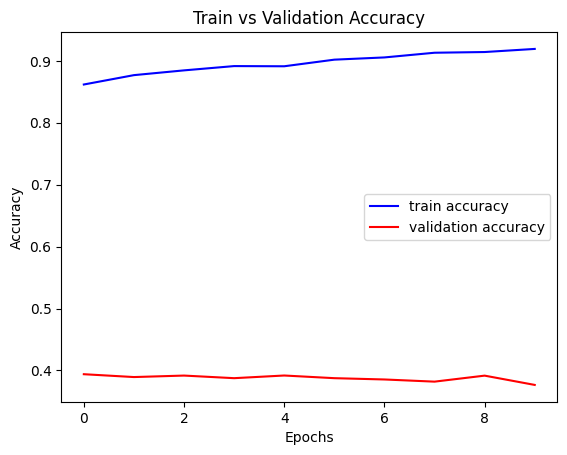

In [34]:
#Visualization
plt.plot(result.history['accuracy'],label = 'train accuracy',color = 'blue')
plt.plot(result.history['val_accuracy'],label = 'validation accuracy',color = 'red')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()